In [135]:
path = '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots'

In [136]:
import glob

In [174]:
files = glob.glob('%s/out_20171130_17*node*_cat[0-9]*_mjj/cat_opt.json' % path)

In [175]:
files

['/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots/out_20171130_172949_node_SM_cat0_transformed_mjj/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots/out_20171130_172949_node_SM_cat1_transformed_mjj/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots/out_20171130_172949_node_SM_cat2_transformed_mjj/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots/out_20171130_172949_node_SM_cat3_transformed_mjj/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots/out_20171130_172949_node_SM_cat5_transformed_mjj/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots/out_20171130_172949_node_SM_cat4_transformed_mjj/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/michel

In [176]:
import json 
import numpy as np

summary = { x:[] for x in ['node', 'cat', 'boundaries','ncat','fom','selections']  }

for fil in files:
    toks = fil.split('/')[-2].split('node_')
    name = toks[1].split('_')[0]
    cat = int(toks[1].split('_')[1].replace('cat',''))
    if name == 'SM': name = '0'
    node = int(name)
    with open(fil) as fin:
        info = json.loads(fin.read())
        fin.close()
    for key,val in info.items():
        val['node'] = node
        val['cat'] = cat
        val['boundaries'] = np.array(val['boundaries'])
        val['selections'] = np.array(val['selections']).astype(float)
        for col in summary.keys():
            summary[col].append( val[col] )

# print(summary)
    

In [177]:
import pandas as pd
df = pd.DataFrame(summary)

In [178]:
# df.set_index(['ncat','node'],drop=False,inplace=True# )

In [179]:
df.sort_index(inplace=True)
df

,boundaries,cat,fom,ncat,node,selections
0,"[1.01, 0.0]",0,-0.722,1,0,"[-15.539, -39.938]"
1,"[1.01, 0.0]",1,-2.057,1,0,"[-28.193, -36.462]"
2,"[1.01, 0.0]",2,-3.811,1,0,"[-30.081, -25.419]"
3,"[1.01, 0.0]",3,-0.563,1,0,"[-25.597, -34.981]"
4,"[1.01, 0.0]",5,-1.716,1,0,"[-25.024, -31.6]"
5,"[1.01, 0.0]",4,-1.427,1,0,"[-21.372, -29.735]"
6,"[1.01, 0.0]",7,-0.958,1,0,"[-19.662, -23.831]"
7,"[1.01, 0.0]",8,-1.062,1,0,"[-66.732, -21.432]"
8,"[1.01, 0.0]",6,-0.417,1,0,"[-37.826, -36.209]"


In [180]:
from sklearn.cluster import KMeans

In [181]:
boundaries = []

# for ncats in [1]:
for row in df['selections']:
    boundaries.append( row )

In [182]:
boundaries = np.array(boundaries)

df['min_mjj'] = boundaries[:,1].ravel().astype(np.float)
df['max_mjj'] = -boundaries[:,0].ravel().astype(np.float)
#boundaries[:,:,1].shape

In [169]:
df['fom'] = -df['fom']

In [170]:
grouped = df.groupby('cat')

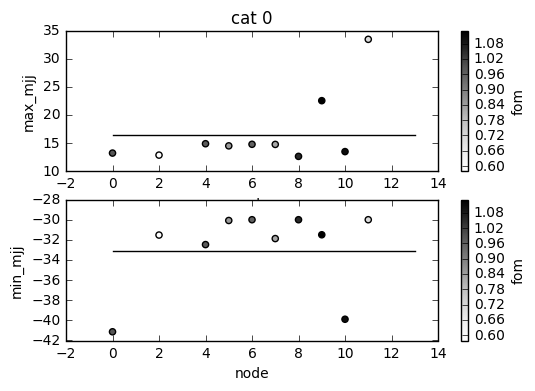

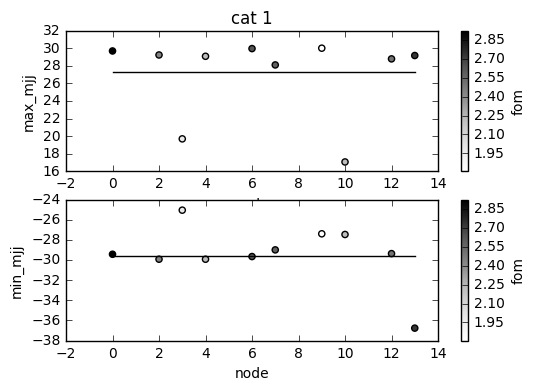

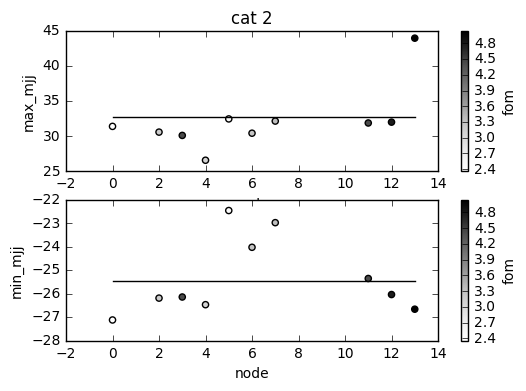

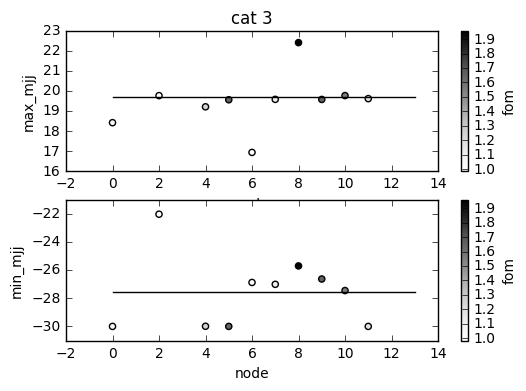

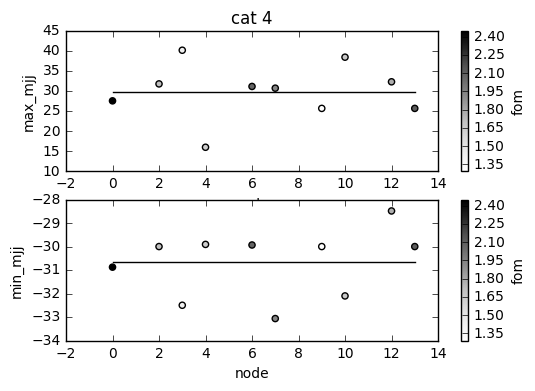

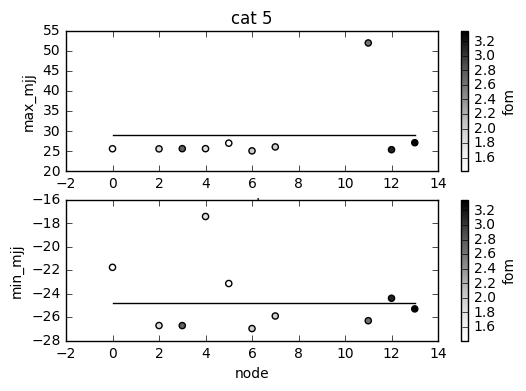

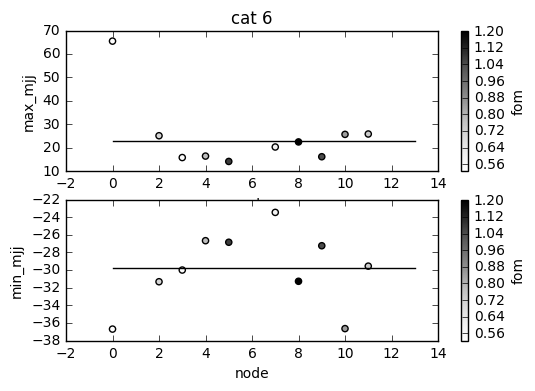

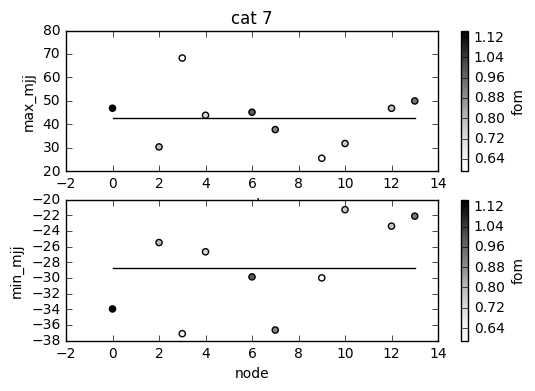

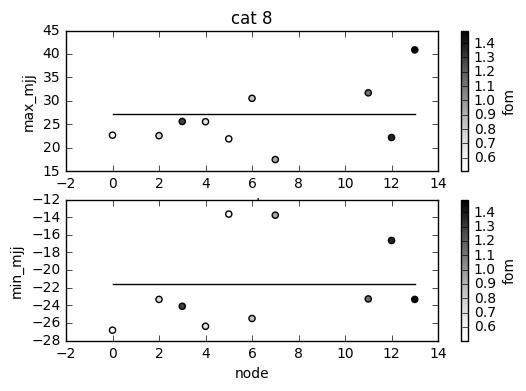

In [171]:
import matplotlib.pyplot as plt

avgs = []

for group in grouped.groups:
    grp = grouped.get_group(group)
    min_fom = np.percentile(grp['fom'],20.)
    grp = grp[ grp['fom'] > min_fom ]
    ax = plt.subplot(2,1,1)
    plt.title('cat %d' % group)
    grp.plot.scatter( 'node', 'max_mjj', c='fom', ax=ax)    
    max_avg = (grp['max_mjj'] * grp['fom']).sum() / grp['fom'].sum()
    ax.plot((0,13),(max_avg,max_avg),'k-')
    
    ax=plt.subplot(2,1,2)
    grp.plot.scatter( 'node', 'min_mjj', c='fom', ax=ax)
    min_avg = (grp['min_mjj'] * grp['fom']).sum() / grp['fom'].sum()
    ax.plot((0,13),(min_avg,min_avg),'k-')

    avgs.append([group,min_avg,max_avg])
    plt.show()

In [172]:
avgs

[[0, -33.10527759015143, 16.501404946072558],
 [1, -29.634776138017045, 27.313840989399292],
 [2, -25.471502427117898, 32.679868085456484],
 [3, -27.59319526891319, 19.700078925835008],
 [4, -30.672714088474073, 29.734587397139222],
 [5, -24.79606558697208, 29.000936828919116],
 [6, -29.817380774962743, 23.123681073025338],
 [7, -28.720374210014587, 42.806333859990275],
 [8, -21.59208733305509, 27.26817581385642]]

In [130]:
avgs = np.array(avgs)
round_to = 1.

In [150]:
rounded = np.round(avgs[:,1:3] / round_to)*round_to

TypeError: list indices must be integers, not tuple

In [151]:
rounded[:,1] = np.vstack( [rounded[:,1],np.ones_like(rounded[:,1])*35] ).min(axis=0)

In [152]:
rounded

array([[ 96.,  35.]])

In [153]:
rounded+=125
rounded

array([[ 221.,  160.]])

In [202]:
###for 1 node only
bound = np.round(np.vstack((df['min_mjj']+125,df['max_mjj']+125)),0)
bound

array([[  85.,   89.,  100.,   90.,   93.,   95.,  101.,  104.,   89.],
       [ 141.,  153.,  155.,  151.,  150.,  146.,  145.,  192.,  163.]])